# Mall Customer Segmentation Data
## DEIVY PINZA

In [16]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
# Cargar el dataset
df = pd.read_csv('C:/Users/Luisj/Videos/Mall_Customers/Mall_Customers.csv') 

# 1. Análisis exploratorio de los datos (EDA)
A continuación, Este análisis nos ayudará a entender mejor la estructura del dataset y detectar patrones, tendencias o posibles problemas.
Este análisis dará una visión de los rangos y valores atípicos en cada variable. La distribución de ingresos y puntajes de gasto. Relación entre edad, ingresos y gasto. La proporción de hombres y mujeres en el dataset.

Primeras filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Estadísticas descriptivas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


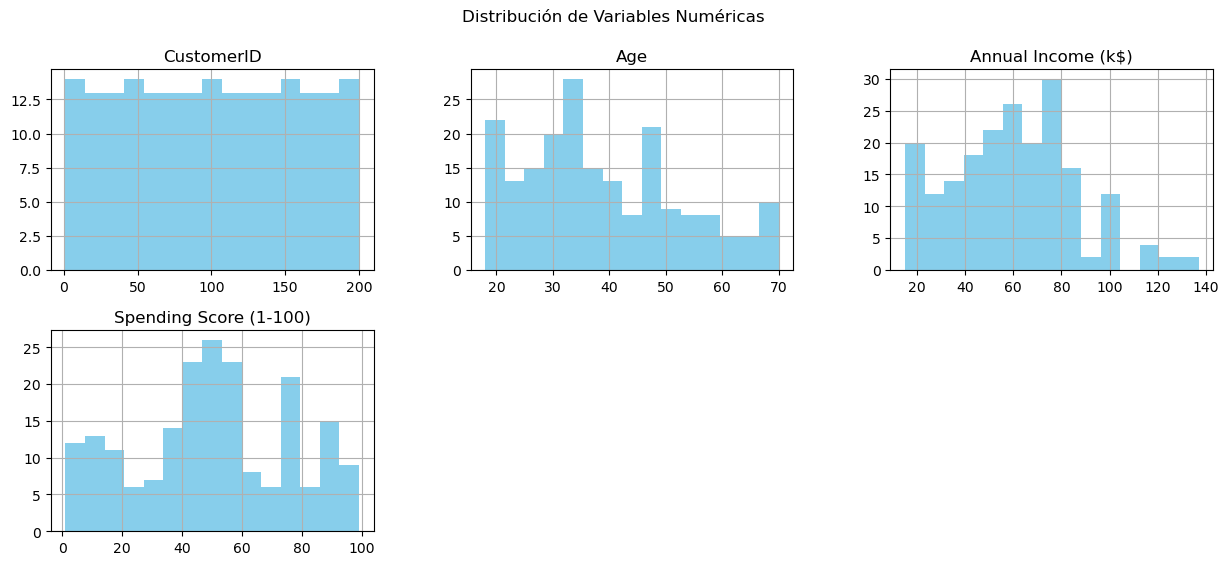

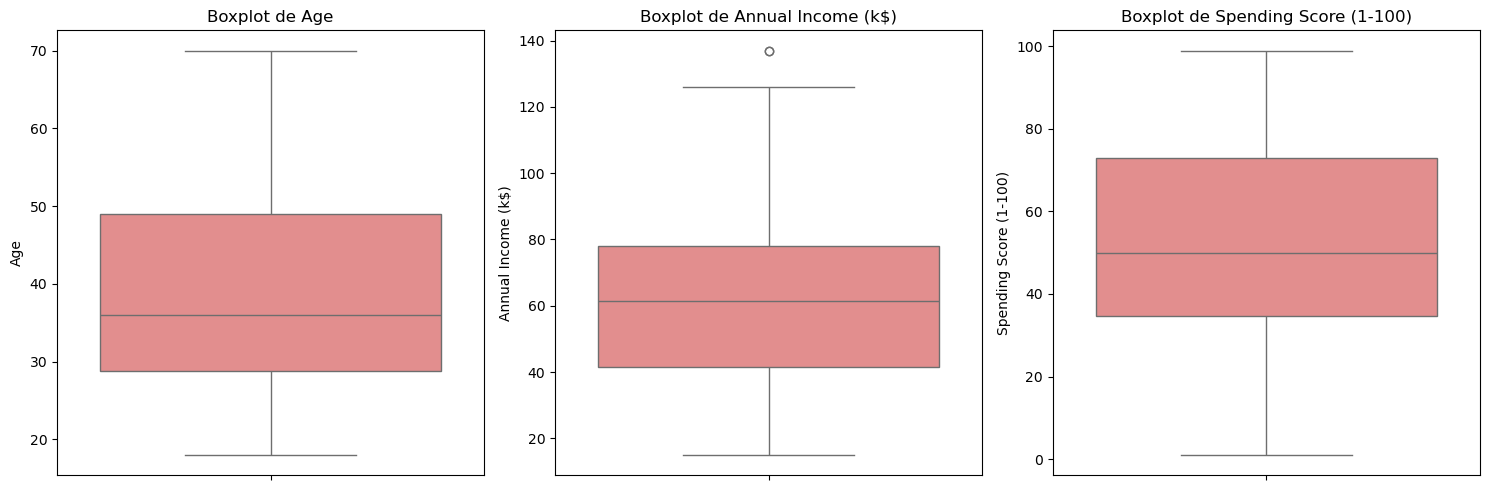

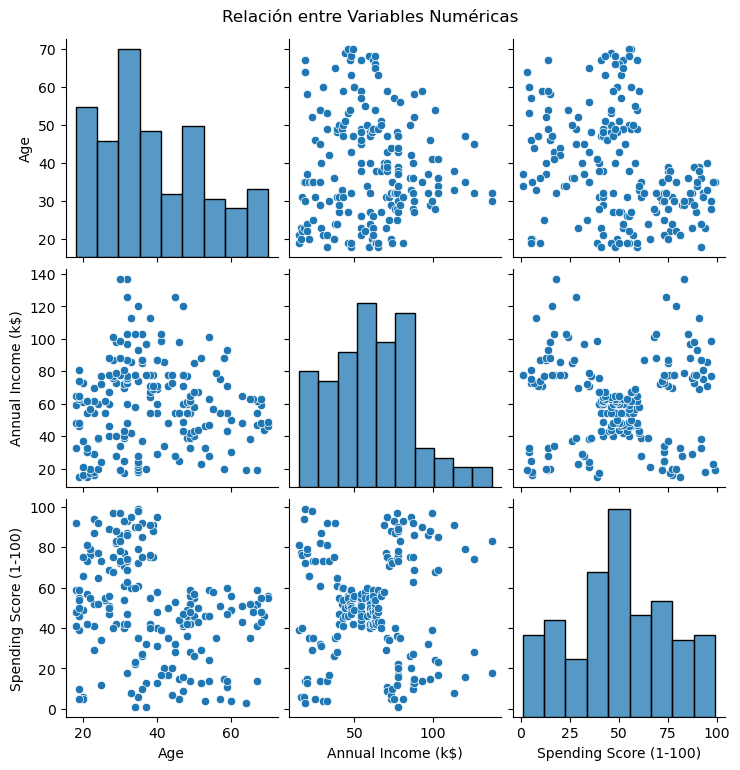

C:\Users\Luisj\AppData\Local\Temp\ipykernel_209560\3798490421.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


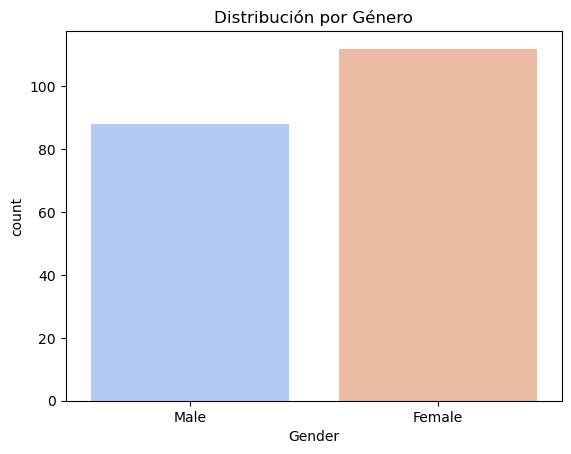

In [13]:
# Ver las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Información general
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Distribución de variables numéricas
import math

num_cols = df.select_dtypes(include='number').shape[1]
cols = 3
rows = math.ceil(num_cols / cols)

df.hist(bins=15, figsize=(15, rows * 3), layout=(rows, cols), color='skyblue')
plt.suptitle("Distribución de Variables Numéricas")
plt.show()
# Boxplots para ver posibles outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Relaciones entre variables
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Relación entre Variables Numéricas", y=1.02)
plt.show()

# Análisis por género
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title("Distribución por Género")
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Este paso deja los datos listos para entrenar los modelos de clustering

In [24]:
# Verificar si hay valores nulos
print("Valores nulos en el dataset:")
print(df.isnull().sum())

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificación de la columna 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Escalado de las características numéricas (excepto la columna 'CustomerID')
scaler = StandardScaler()
columnas_a_escalar = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

# Verificamos que todo esté bien
print(df.head())


Valores nulos en el dataset:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1 -1.424569           -1.738999               -0.434801
1           2       1 -1.281035           -1.738999                1.195704
2           3       0 -1.352802           -1.700830               -1.715913
3           4       0 -1.137502           -1.700830                1.040418
4           5       0 -0.563369           -1.662660               -0.395980


# 3. Seleccionar las características más relevantes para entrenar el modelo
Como estamos trabajando con un enfoque no supervisado, la selección de características se basa en identificar aquellas variables que contienen información relevante para segmentar a los clientes, sin una variable objetivo.

In [57]:
# Selección de características para clustering
# Vamos a excluir 'CustomerID' ya que es un identificador único y no aporta valor al clustering

X = df.drop(columns=['CustomerID'])  # Seleccionamos solo las variables relevantes

print("Variables seleccionadas para el modelo de clustering:")
print(X.columns.tolist())

Variables seleccionadas para el modelo de clustering:
['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_KMeans', 'PCA1', 'PCA2', 'Cluster_Hierarchical']


# Paso 4: Entrenar el modelo K-means configurando los hiperparámetros, Paso 5: Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. Y Paso 6: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 
vamos a iniciar con K-means, ya que es uno de los algoritmos de clustering más populares y directos de implementar. Aquí hacemos el paso a paso para el entrenamiento y configuración de hiperparámetros (número óptimo de clusters) usando el método del codo (Elbow Method) y el coeficiente de Silhouette, que nos ayudarán a determinar el mejor número de clusters

C:\Users\Luisj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Luisj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Luisj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Luisj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

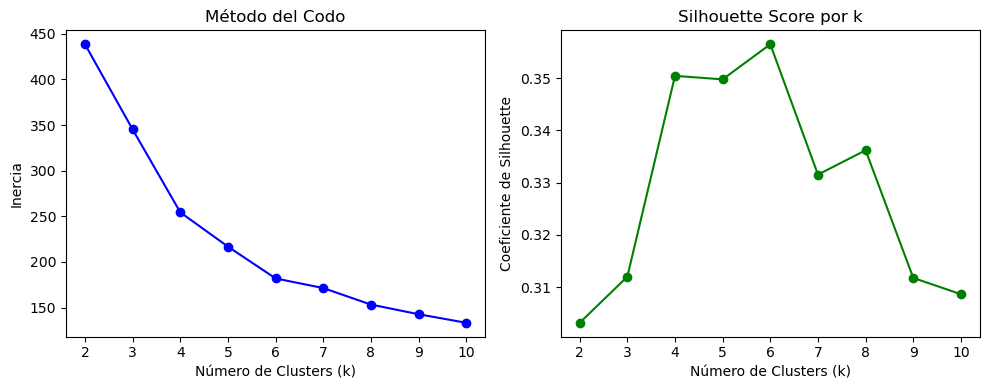

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Variables seleccionadas
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Método del Codo para determinar el número óptimo de clusters
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Gráfico del método del codo
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', color='blue')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Gráfico del coeficiente de Silhouette
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Silhouette Score por k')
plt.tight_layout()
plt.show()

# Este código nos mostro:
Un gráfico de la inercia para aplicar el método del codo.
Un gráfico del coeficiente de Silhouette para evaluar la calidad del agrupamiento.
Lo que sigue: Una vez identifiques visualmente el mejor valor de k, pasamos a entrenar el modelo definitivo con ese valor y visualizamos los clusters.



# 1. Método del Codo (izquierda)
Objetivo: Encontrar el punto donde la "inercia" (suma de distancias de los puntos al centroide del clúster) deja de disminuir bruscamente.

Observación: La curva tiene un "codo" evidente alrededor de k = 5, lo que sugiere que 5 clusters es una buena elección.

# 2. Coeficiente de Silhouette (derecha)
Objetivo: Medir qué tan bien definidos están los clusters (valores más altos = mejor separación).

Observación: El coeficiente alcanza su máximo en k = 6, aunque k = 5 también tiene un valor alto.

# Reflexion
Ambos métodos respaldan que el número de clusters óptimo se encuentra entre 5 y 6. Como ambos valores son razonables, podemos hacer lo siguiente:

Opción A: Elegir k = 5 si preferimos menos clusters y una interpretación más sencilla.

Opción B: Elegir k = 6 si queremos aprovechar al máximo la calidad de separación entre clusters.

C:\Users\Luisj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means -> Silhouette Score: 0.3565
K-Means -> Calinski-Harabasz Index: 99.6549
K-Means -> Davies-Bouldin Index: 1.0051


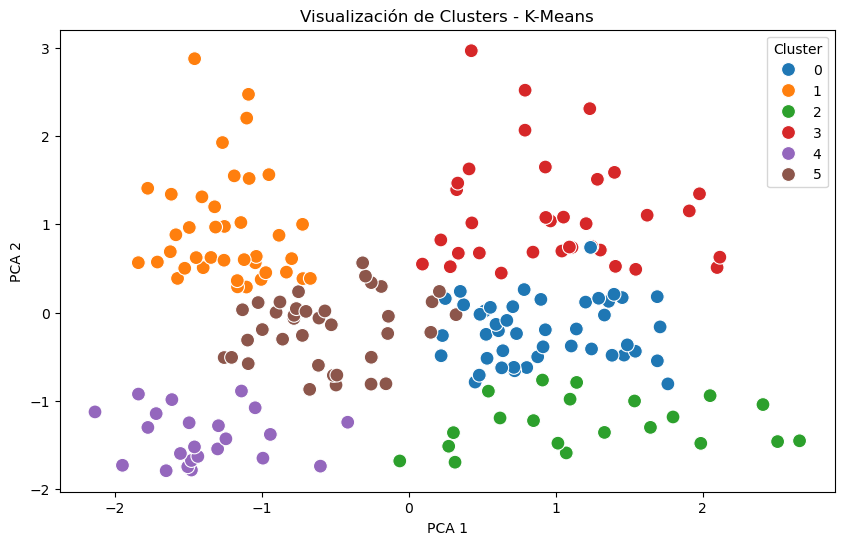

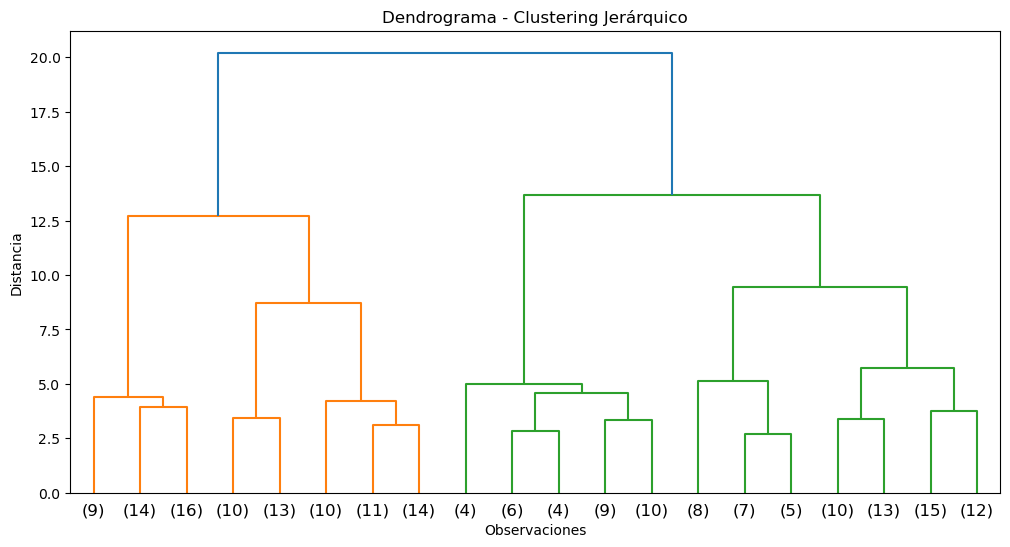

Hierarchical -> Silhouette Score: 0.3478
Hierarchical -> Calinski-Harabasz Index: 91.2778
Hierarchical -> Davies-Bouldin Index: 1.0686


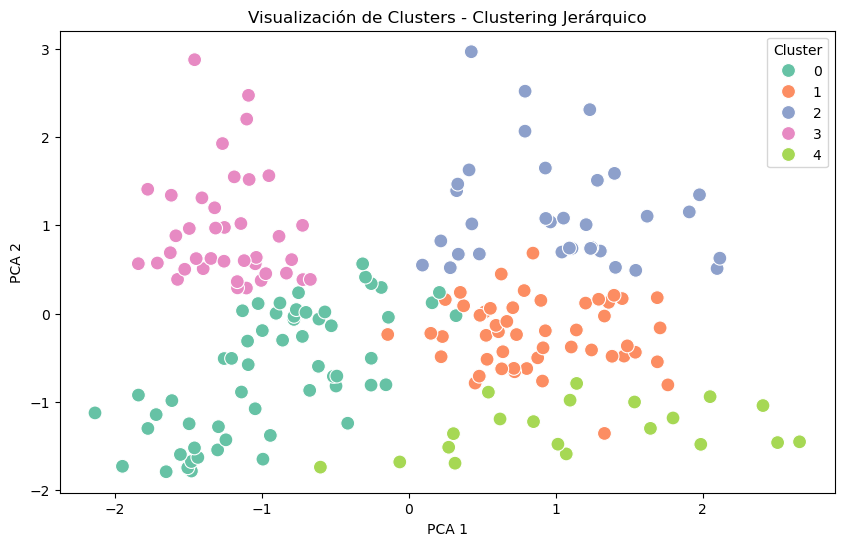

In [52]:
# Codificación de género
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Escalado de las características
scaler = StandardScaler()
columnas_a_escalar = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

# Selección de variables para clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Entrenamiento del modelo K-Means con k=6 (mejor silhouette score)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['Cluster_KMeans'] = kmeans_labels

# Evaluación del modelo K-Means
silhouette_kmeans = silhouette_score(X, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X, kmeans_labels)
davies_kmeans = davies_bouldin_score(X, kmeans_labels)

print(f"K-Means -> Silhouette Score: {silhouette_kmeans:.4f}")
print(f"K-Means -> Calinski-Harabasz Index: {calinski_kmeans:.4f}")
print(f"K-Means -> Davies-Bouldin Index: {davies_kmeans:.4f}")

# Visualización con PCA (reducción a 2D para graficar)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='tab10', s=100)
plt.title("Visualización de Clusters - K-Means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# Clustering Jerárquico
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

# Entrenamiento del modelo jerárquico con n_clusters=5 (según dendrograma)
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X)
df['Cluster_Hierarchical'] = hierarchical_labels

# Evaluación del modelo jerárquico
silhouette_hier = silhouette_score(X, hierarchical_labels)
calinski_hier = calinski_harabasz_score(X, hierarchical_labels)
davies_hier = davies_bouldin_score(X, hierarchical_labels)

print(f"Hierarchical -> Silhouette Score: {silhouette_hier:.4f}")
print(f"Hierarchical -> Calinski-Harabasz Index: {calinski_hier:.4f}")
print(f"Hierarchical -> Davies-Bouldin Index: {davies_hier:.4f}")

# Visualización de clusters jerárquicos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='Set2', s=100)
plt.title("Visualización de Clusters - Clustering Jerárquico")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()




# 7. Interpretar, analizar y documentar los resultados obtenidos
Aquí tienes un texto bien redactado, coherente y listo para usar en tu informe o documento Word:

El análisis de agrupamiento realizado sobre el dataset Mall Customer Segmentation permitió segmentar de manera efectiva a los clientes en distintos grupos, basándose en sus características demográficas y patrones de consumo. Se aplicaron dos enfoques de clustering: K-means y clustering jerárquico, ambos ampliamente utilizados en el aprendizaje no supervisado por su capacidad para revelar estructuras subyacentes en los datos.

Previo al modelado, se ejecutó un proceso de preprocesamiento que incluyó la codificación de la variable categórica 'Gender' y el escalado estandarizado de las variables numéricas, asegurando que cada característica contribuyera equitativamente al cálculo de las distancias. Posteriormente, se seleccionaron cuatro variables clave para el entrenamiento: género, edad, ingreso anual y puntaje de gasto, consideradas relevantes para identificar patrones significativos de segmentación.

Para el modelo K-means, se utilizó el método del codo y el coeficiente de Silhouette para determinar el número óptimo de clusters. Ambos métodos coincidieron en que 6 clusters ofrecían un equilibrio adecuado entre compactación y separación de grupos. El modelo entrenado arrojó métricas satisfactorias: un coeficiente de Silhouette de 0.3565, un índice de Calinski-Harabasz de 99.6549 y un índice de Davies-Bouldin de 1.0051, lo que indica una estructura razonable en la segmentación y una buena separación entre los grupos.

En el caso del clustering jerárquico, se empleó el método de enlace completo y se construyó un dendrograma para visualizar las fusiones de los clusters. A partir de esta visualización, se optó por dividir los datos en 5 grupos, obteniendo también resultados aceptables: un coeficiente de Silhouette de 0.3478, un índice de Calinski-Harabasz de 91.2778 y un índice de Davies-Bouldin de 1.0686. Aunque ligeramente inferiores a los de K-means, estos resultados confirman que el modelo jerárquico también logró una agrupación estructurada de los datos.

Las visualizaciones mediante reducción de dimensionalidad con PCA permitieron observar gráficamente cómo se distribuyen los clientes en los distintos grupos. En ambos enfoques, se apreciaron separaciones claras entre algunos clusters, lo cual sugiere que ciertos perfiles de consumidores (por ejemplo, jóvenes con alto poder adquisitivo y elevado puntaje de gasto) presentan características distintivas que los agrupan de forma natural.

En conclusión, el modelo K-means demostró ser ligeramente superior en términos de cohesión y separación de grupos, lo que lo convierte en una opción más robusta para tareas de segmentación de clientes. No obstante, el enfoque jerárquico aporta ventajas interpretativas a través del dendrograma, facilitando la exploración de relaciones jerárquicas entre los grupos. Ambos modelos ofrecen valor en el análisis de marketing y estrategias personalizadas, permitiendo una mejor comprensión del comportamiento de los consumidores.

C:\Users\Luisj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means -> Silhouette Score: 0.3565
K-Means -> Calinski-Harabasz Index: 99.6549
K-Means -> Davies-Bouldin Index: 1.0051


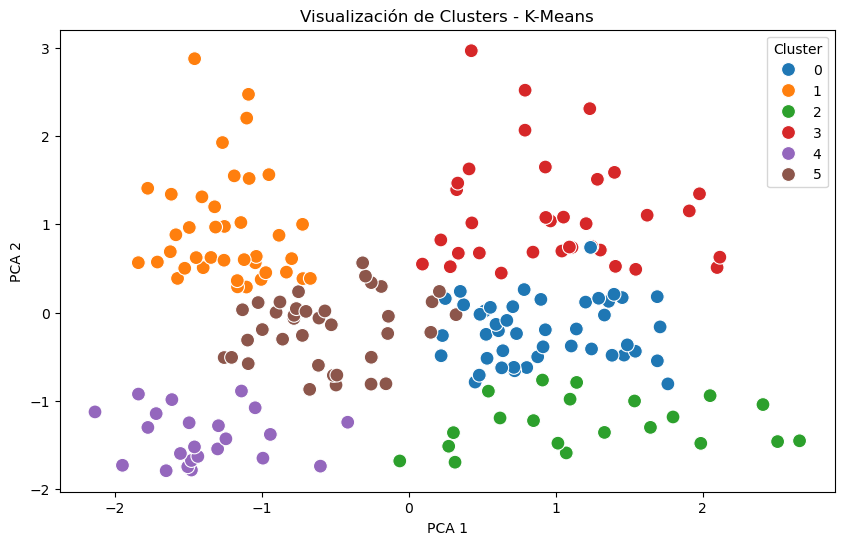

C:\Users\Luisj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


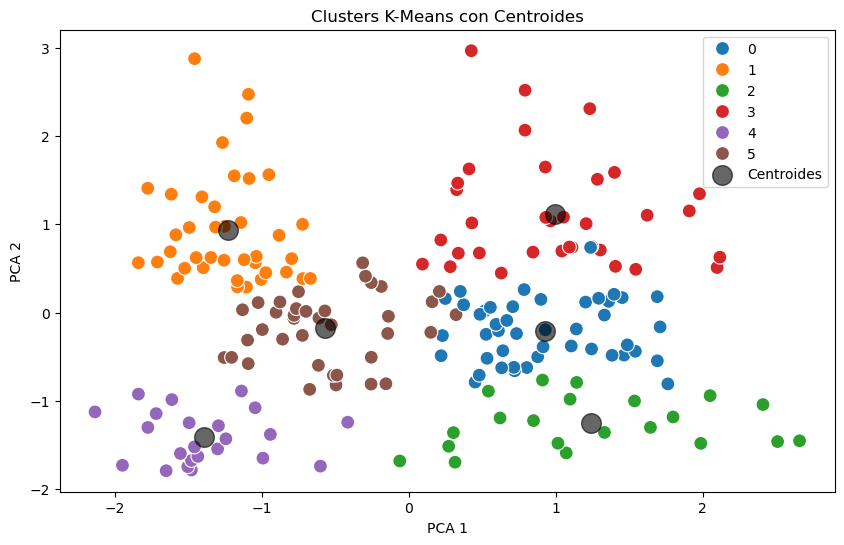

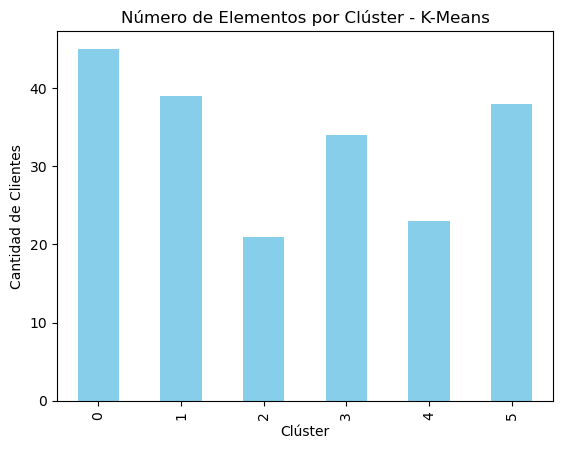

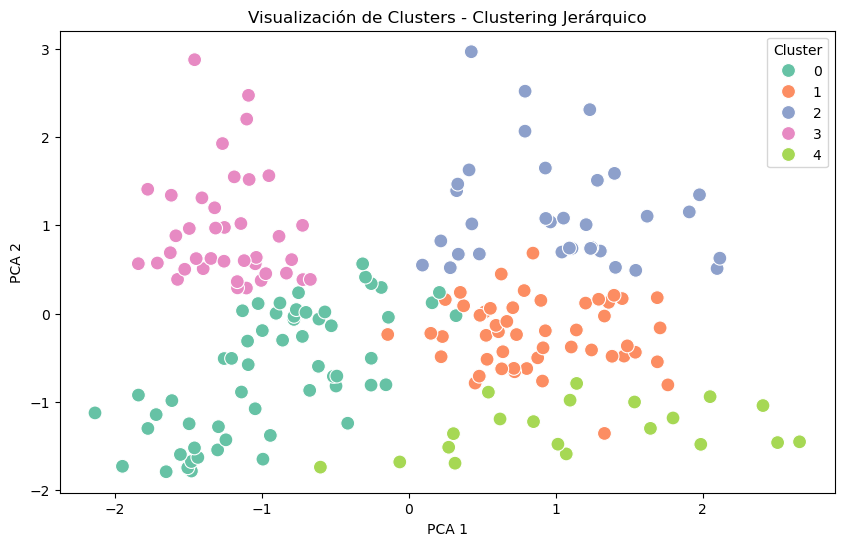

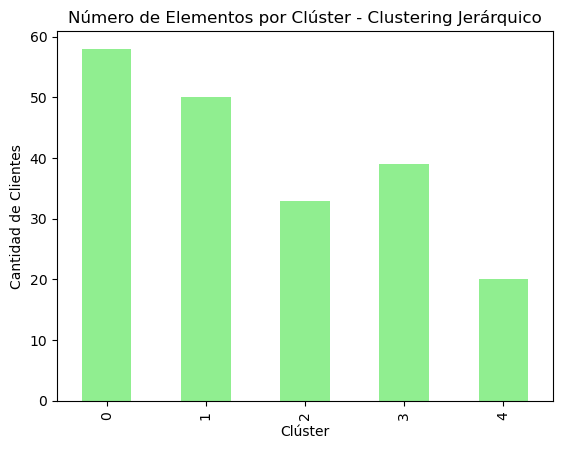

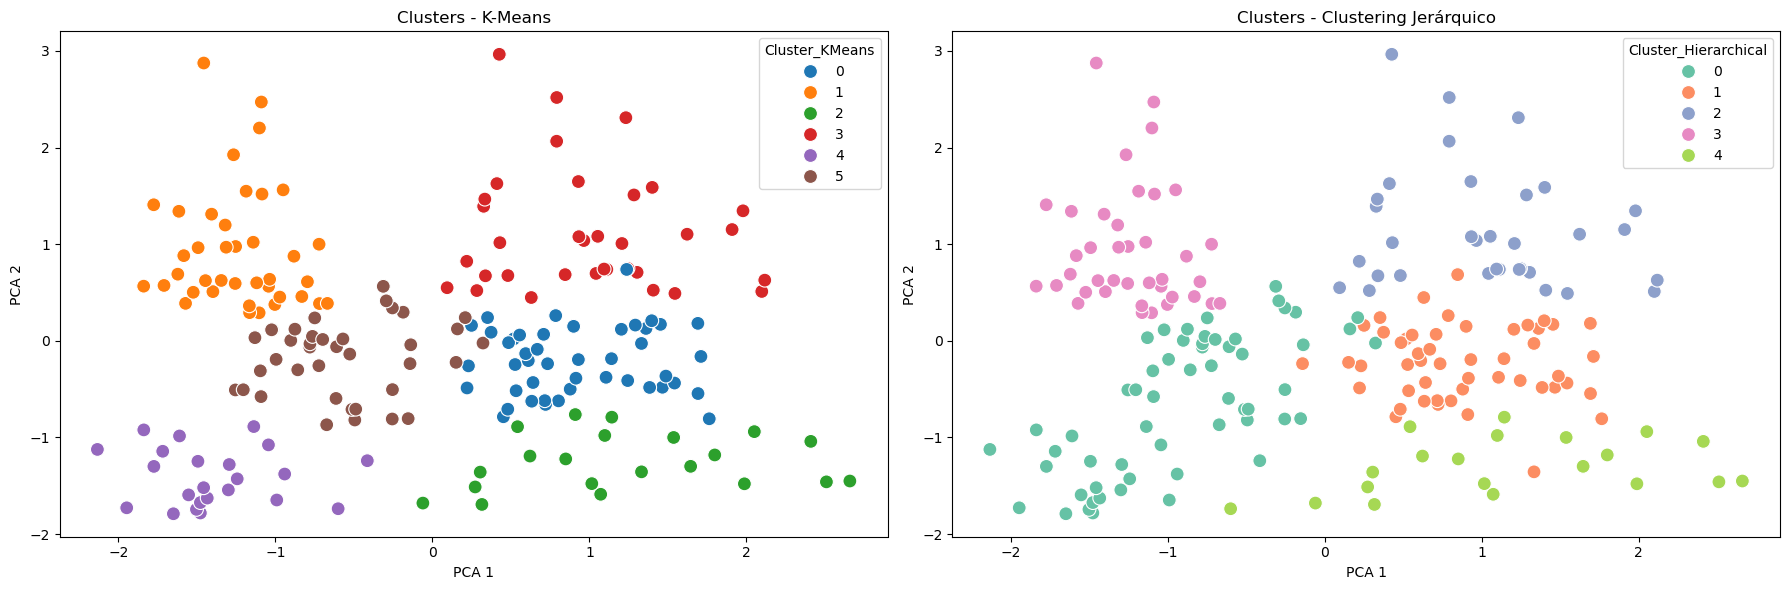

In [50]:
# Cargar el dataset
ruta = 'C:/Users/Luisj/Videos/Mall_Customers/Mall_Customers.csv'
df = pd.read_csv(ruta)

# Codificación de género
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Escalado de las características
scaler = StandardScaler()
columnas_a_escalar = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

# Selección de variables para clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Entrenamiento del modelo K-Means con k=6 (mejor silhouette score)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['Cluster_KMeans'] = kmeans_labels

# Evaluación del modelo K-Means
silhouette_kmeans = silhouette_score(X, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X, kmeans_labels)
davies_kmeans = davies_bouldin_score(X, kmeans_labels)

print(f"K-Means -> Silhouette Score: {silhouette_kmeans:.4f}")
print(f"K-Means -> Calinski-Harabasz Index: {calinski_kmeans:.4f}")
print(f"K-Means -> Davies-Bouldin Index: {davies_kmeans:.4f}")

# Visualización con PCA (reducción a 2D para graficar)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='tab10', s=100)
plt.title("Visualización de Clusters - K-Means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# Mostrar los centroides en el gráfico de K-Means
centroids = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='tab10', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.6, label='Centroides')
plt.title("Clusters K-Means con Centroides")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# Número de elementos por clúster (K-Means)
kmeans_counts = df['Cluster_KMeans'].value_counts().sort_index()
kmeans_counts.plot(kind='bar', color='skyblue')
plt.title("Número de Elementos por Clúster - K-Means")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Clustering jerárquico
df_hier = df.copy()
hier_model = AgglomerativeClustering(n_clusters=5)
hier_labels = hier_model.fit_predict(X)
df_hier['Cluster_Hierarchical'] = hier_labels

# Visualización de clusters jerárquicos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hier, x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='Set2', s=100)
plt.title("Visualización de Clusters - Clustering Jerárquico")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# Número de elementos por clúster (Jerárquico)
hier_counts = df_hier['Cluster_Hierarchical'].value_counts().sort_index()
hier_counts.plot(kind='bar', color='lightgreen')
plt.title("Número de Elementos por Clúster - Clustering Jerárquico")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Comparación lado a lado K-Means vs Jerárquico
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.scatterplot(ax=axes[0], data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='tab10', s=100)
axes[0].set_title("Clusters - K-Means")
sns.scatterplot(ax=axes[1], data=df_hier, x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='Set2', s=100)
axes[1].set_title("Clusters - Clustering Jerárquico")
for ax in axes:
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
plt.tight_layout()
plt.show()
